In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
data = pd.read_csv("deliverytime.txt")

In [3]:
data.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_of_order Type_of_vehicle  Time_taken(min)  
0                    75.912471        Snack      motorcycle                24  
1                    77.813237        Snack         scooter                33  
2                    77.688400       Drinks      motorcycle                26  
3                    77.026494       Buffet      motorcycle                21  
4                    80.289982        Snack         scooter                30

In [4]:
data.shape

(45593, 11)

In [5]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [6]:
data.describe()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         45593.000000             45593.000000         45593.000000   
mean             29.544075                 4.632367            17.017729   
std               5.696793                 0.327708             8.185109   
min              15.000000                 1.000000           -30.905562   
25%              25.000000                 4.600000            12.933284   
50%              29.000000                 4.700000            18.546947   
75%              34.000000                 4.800000            22.728163   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          45593.000000                45593.000000   
mean              70.231332                   17.465186   
std               22.883647                    7.335122   
min              -88.366217                    0.010000   
25%               73.170000                   12.988453   
50%               75.898497                   18.633934   
75%               78.044095                   22.785049   
max               88.433452                   31.054057   

       Delivery_location_longitude  Time_taken(min)  
count                 45593.000000     45593.000000  
mean                     70.845702        26.294607  
std                      21.118812         9.383806  
min                       0.010000        10.000000  
25%                      73.280000        19.000000  
50%                      76.002574        26.000000  
75%                      78.107044        32.000000  
max                      88.563452        54.000000

In [7]:
data.tail()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
45588  7C09      JAPRES04DEL01                   30                      4.8   
45589  D641      AGRRES16DEL01                   21                      4.6   
45590  4F8D     CHENRES08DEL03                   30                      4.9   
45591  5EEE    COIMBRES11DEL01                   20                      4.7   
45592  5FB2   RANCHIRES09DEL02                   23                      4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude Type_of_order Type_of_vehicle  \
45588                    75.804257         Meal      motorcycle    
45589                     0.070000       Buffet      motorcycle    
45590                    80.272439       Drinks         scooter    
45591                    77.026241        Snack      motorcycle    
45592                    85.405731        Snack         scooter    

       Time_taken(min)  
45588               32  
45589               36  
45590               16  
45591               26  
45592               36

In [8]:
# Data seems alright. Doesn't require cleaning.

## EDA

In [9]:
from geopy.distance import geodesic

In [10]:
# We need a new column "Distance" in order to further analyze the relation between all the variables
# we will create a function that will take restaurant and delivery location coordinates and give the total distance

def calculate_distance(row):
    restaurant_coor = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coor = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(restaurant_coor, delivery_coor).kilometers

In [11]:
data['distance'] = data.apply(calculate_distance, axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
 11  distance                     45593 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 4.2+ MB


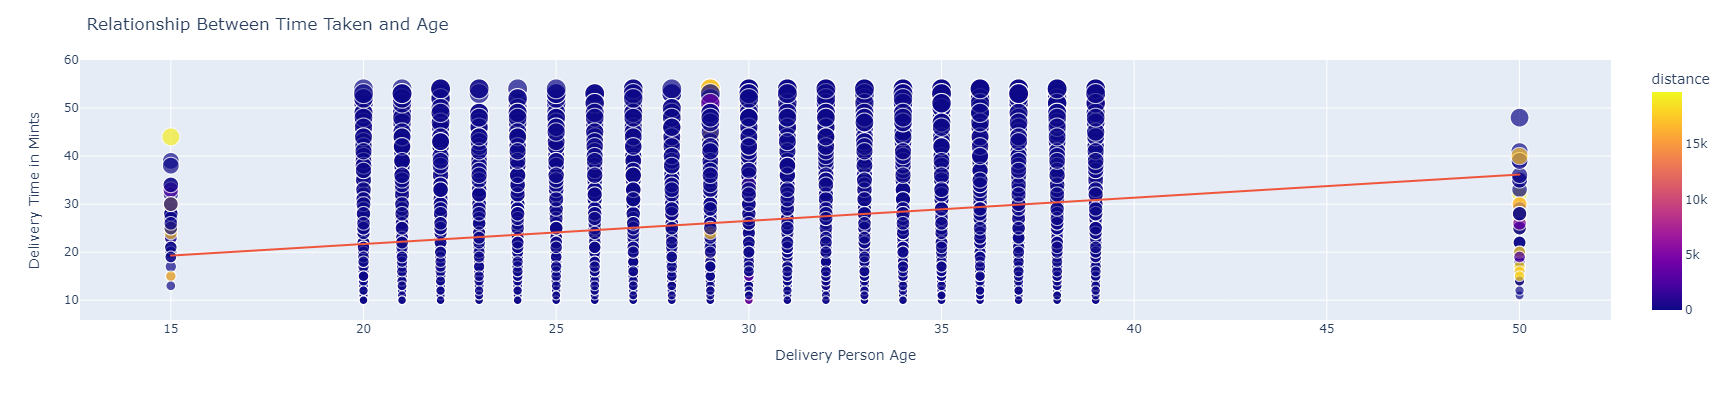

In [24]:
# Now let's see the re;ation between the delivery partners age and the time taken for delivery
fig = px.scatter(data_frame = data, 
                    x="Delivery_person_Age",
                    y="Time_taken(min)", 
                    size="Time_taken(min)", 
                    color = "distance",
                    trendline="ols")

fig.update_layout(width=800, height=400, title = "Relationship Between Time Taken and Age", xaxis_title='Delivery Person Age', yaxis_title='Delivery Time in Mints')
fig.show()

#### There's linear relation between age and delivery time. Younger delivery partners can deliver much faster than the older ones. We can also observe that majority of them resides in age group 20-40.

In [ ]:
# Now let's have a look at Ratings of delivery partners and time taken for delivery.
